In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from vdata import Voynich, Folio
from IPython.display import Image

In [2]:
a = Voynich()
a.data[:10]

,folio,line,paragraph,text,words
0,f1r,1,P1,fachys ykal ar ataiin shol shory cthres y kor ...,10
1,f1r,2,P1,sory ckhar or y kair chtaiin shar are cthar ct...,11
2,f1r,3,P1,syaiir sheky or ykaiin shod cthoary cthes dara...,9
3,f1r,4,P1,ooiin oteey oteos roloty cthar daiin otaiin or...,9
4,f1r,5,P1,dair y chear cthaiin cphar cfhaiin,6
5,f1r,6,T1,ydaraishy,1
6,f1r,7,P2,odar o y shol cphoy oydar sh s cfhoaiin shodary,10
7,f1r,8,P2,yshey shody okchoy otchol chocthy oschy dain c...,9
8,f1r,9,P2,daiin shos cfhol shody,4
9,f1r,10,T2,dain os teody,3


In [3]:
def display(folio):
    return Image('image/{}.jpg'.format(folio))

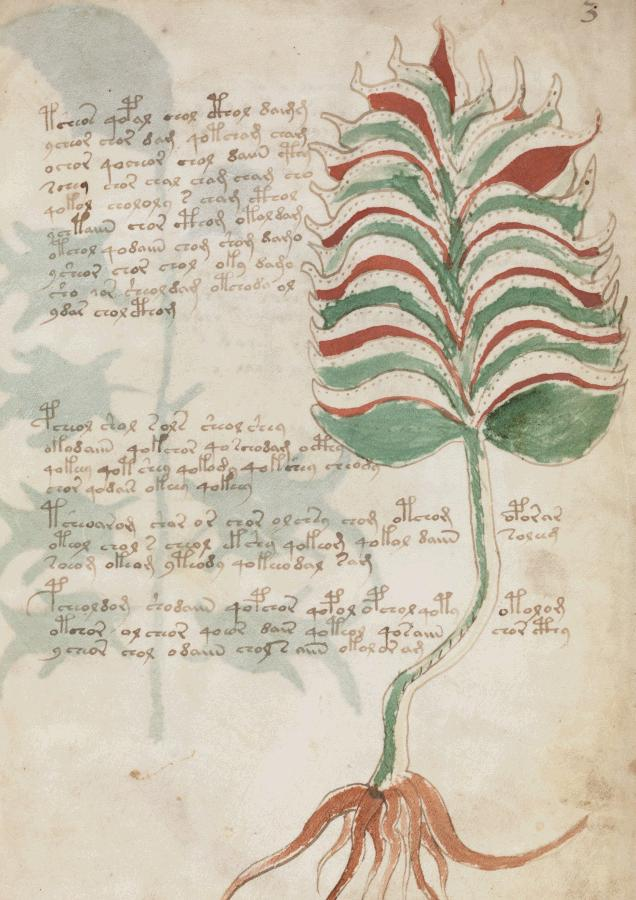

In [4]:
display('f3r')

What do we make of the fact that folio `f3r` has 5 lines which have 5 words each?

What do we make of this long line of characters?

In [6]:
f = Folio('f66r')
'.'.join(f.lines) # all the words on the left margin come first... do they necessarily go in this order?

'rary.rals.qor.dara.ykcol.syly.salf.fary.qotesy.ykaly.daoly.raiin.qokal.qolsa.raral.y.o.s.sh.y.d.o.f..x.air.d.sh.y.f.f.y.o.d.r.f.c.r.x.t.o..l.r.t.o.x.p.d.pdaiin oteedy opchedy chap chefchy shddy ypcher cholpchd okedals.rair shekey qokeedar okal okedy qokeedy qokal okedy qokshd.ykshedy chody cthdy qokees cheeo okcho dy chekeey chedy chckhy.shdy qotedy chdy chedy qotedal chcfheor ykeedy dar qotey kol ar.qokeeody qokeody qokeody qokar sheky qokeeody okedy kodary.ykeeody choekchy okeody chekeody qokeey dyky chctho rotaiin.dsheol okaiin sheodaiin.tocpheey dol kchody qokeody qokshy qopaiin dair ykodas okyd.shol daiir dal ky shka qoky shekair choty dar okchy shdy ykol.qocheky shetey dalal shedy chcta r sheod shokaiir chckhhy dasd.shor sheodal sholdy qokchedy qofchy qoty chedair cheer kardy.qokchey qokaiir cheky daly daiin dal shedy chedy ltar ol okedy.ol cheeky daiir chky axor akar hy daiin.pchof sholfosdaiin qotar otalor fchedys chedy dar odair ofaram.dalcheeeky sheol dairody chekchy shed yk

## What are the distribution of line lengths in the Voynich?

In [7]:
from collections import Counter

def n_word_counts(n):
    counts = Counter(a.data[a.data.words == n].folio)
    c = [counts[f] for f in a.folios]
    return c

cs = []
for n in range(13):
    cs.append(n_word_counts(n))

cs = np.array(cs)
cs.shape

(13, 225)

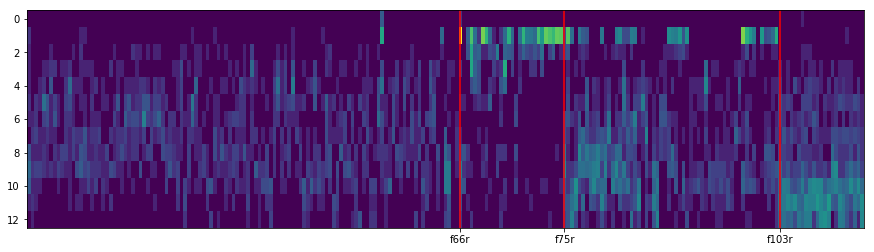

In [8]:
# cs_stacked = np.vstack([cs[:,0:112], np.zeros((5,112)), cs[:,112:112+112]])
cs_stacked = cs
plt.figure(figsize=(15,4))
plt.imshow(cs_stacked**.6, aspect='auto')

markers = ['f66r', # beginning of astrology
           'f75r', # beginning of women bathing
           'f103r', # recipes
          ]
ymin,ymax = plt.ylim()
plt.vlines([a.folios.index(i) for i in markers], ymin, ymax, colors='red')
_ = plt.xticks([a.folios.index(i) for i in markers], markers)

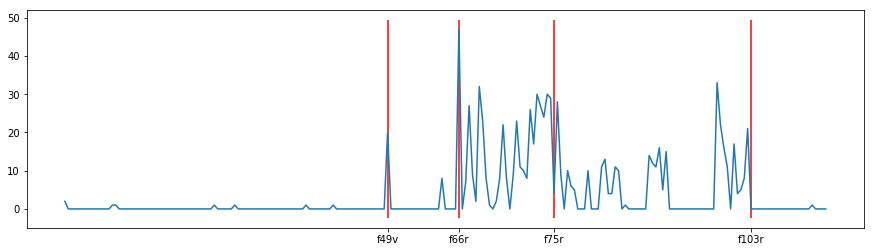

In [9]:
plt.figure(figsize=(15,4))
plt.plot(cs[1,:])

markers = ['f49v', # the one with the line
           'f66r', # beginning of astrology
           'f75r', # beginning of women bathing
           'f103r', # recipes
          ]
ymin,ymax = plt.ylim()
plt.vlines([a.folios.index(i) for i in markers], ymin, ymax, colors='red')
_ = plt.xticks([a.folios.index(i) for i in markers], markers)

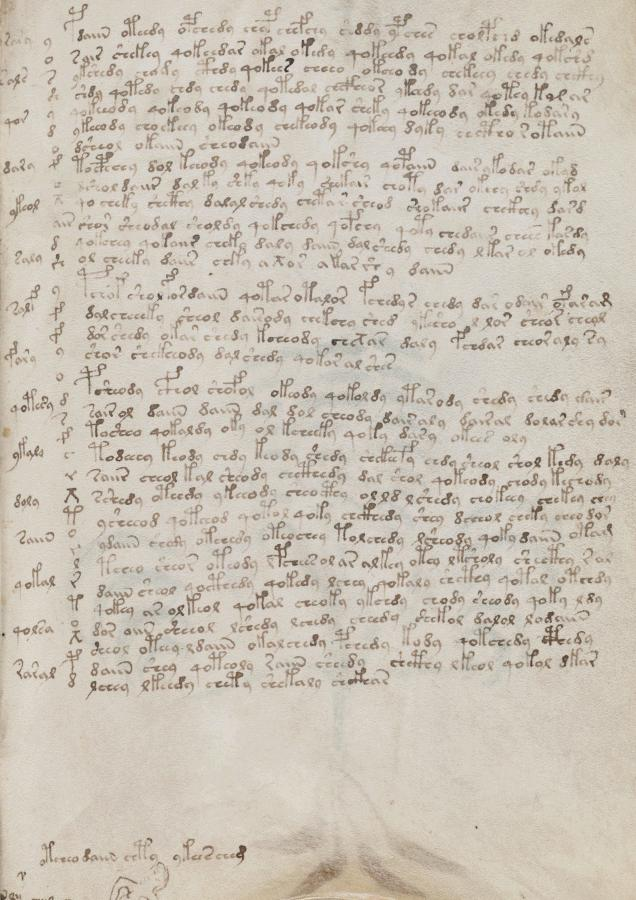

In [10]:
display('f66r')

Another way to look at this is to look at a sliding window. We take 20 folios and average their line length counts, and plot this throughout the manuscript. 
* in matrix terms, we're simply blurring it left-to-right. Then, if the matrix were a sheet of paper, we'd hold it to our eyes with the left edge facing us.
* Each column would be a line in the graph, and the height of the line would be the average line length at that window.

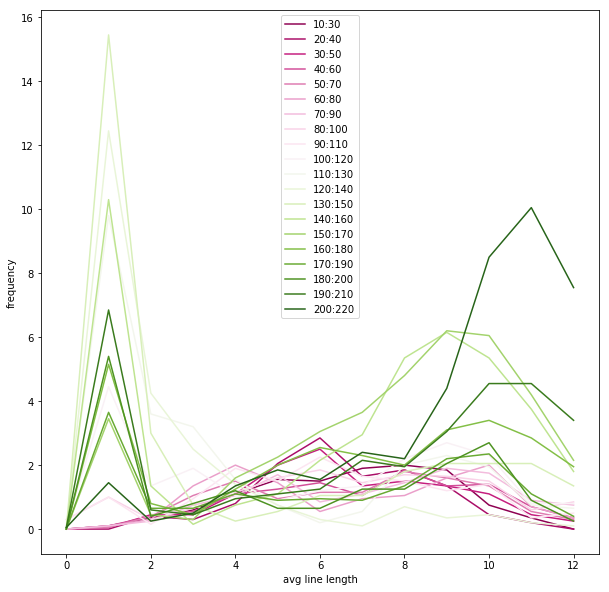

In [11]:
plt.figure(figsize=(10,10))
cmap = plt.get_cmap('PiYG')
colors = [cmap(i) for i in np.linspace(0, 1, 20)]
windows = [10*i for i in range(21)]
window_width = 20

for i, color in enumerate(colors, start=1):
    start = windows[i]
    end = start + window_width
    plt.plot(np.mean(cs[:,start:end], axis=1), color=color, label='{}:{}'.format(start, end))
plt.legend(loc='best')
plt.xlabel('avg line length')
plt.ylabel('frequency')
plt.show()